# Introduction to Data Science 
# Activity for Lecture 9: Linear Regression 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Name: Andreas Martinson

Email: andreas.martinson@utah.edu

UID:u1291396


## Class exercise: amphetamine and appetite

Amphetamine is a drug that suppresses appetite. In a study of this effect, a pharmocologist randomly allocated 24 rats to three treatment groups to receive an injection of amphetamine at one of two dosage levels (2.5 mg/kg or 5.0 mg/kg), or an injection of saline solution (0 mg/kg). She measured the amount of food consumed by each animal (in gm/kg) in the 3-hour period following injection. The results (gm of food consumed per kg of body weight) are shown below.


In [3]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     
from sklearn import linear_model        

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Activity 1: Scatterplot and Linear Regression

**Exercise:** Make a scatter plot with dose as the $x$-variable and food consumption as the $y$ variable. Then run a linear regression on the data using the 'ols' function from the statsmodels python library to relate the variables by 

$$
\text{Food Consumption} = \beta_0 + \beta_1 \text{Dose}. 
$$

What is the resulting linear equation? What is the $R^2$ value? Do you think the variables have a strong linear relationship? Add the line to your scatter plot.


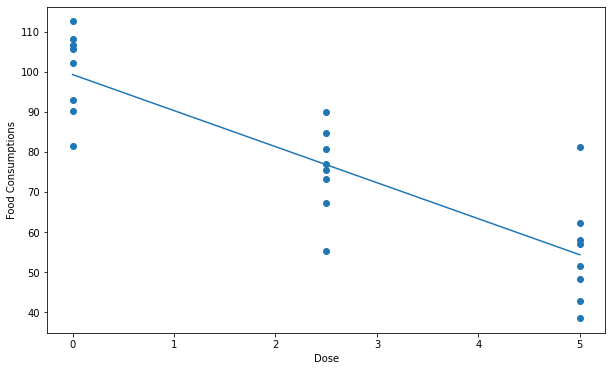

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Food_Consumption   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           7.27e-08
Time:                        19:12:59   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
Dose          -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
food_consum = food_consump_dose0 + food_consump_dose2p5 + food_consump_dose5
dose = [0]*len(food_consump_dose0) + [2.5]*len(food_consump_dose2p5) + [5]*len(food_consump_dose5)

data = pd.DataFrame({'Food_Consumption': food_consum, 'Dose': dose})

x = sm.ols(formula="Food_Consumption ~ Dose", data=data).fit()

plt.scatter(data['Dose'], data['Food_Consumption'])
plt.plot(data['Dose'], x.predict())
plt.xlabel('Dose')
plt.ylabel('Food Consumptions')
plt.show()

x.summary()

**Answer**

The linear equation is y = -9x + 99.33. This means that without any intervention, the rats could be expected to eat 99.33 gm/kg of food and for every 1 mg/kg increase in Amphetamine, the amount the rats eat is predicted to decrease by 9 gm/kg.

The R^2 value is .739, which means the model explains 73.9% of the variability in the data.

I think that there is a fairly strong relationship, we would need more data for this to be definitive, but the R^2 is closer to 1 and it looks like the trend is fairly strong from the scatter plot.

## Activity 2: Residuals

The regression in Activity 1 is in fact valid even though the predictor $x$ only has 3 distinct values; for each fixed value of $x$, the researcher collected a random sample of $y$ values.

However, one assumption which is made by simple linear regression is that the residuals have an approximately normal distribution.

**Exercise:** Compute the residuals for the above regression and make a normal probability plot of the residuals. Do you think they are approximately normally distributed? 



,Food_Consumption,Dose,Residuals,Fitted_Line
0,112.6,0.0,13.26870,99.33130
1,102.1,0.0,2.76870,99.33130
2,90.2,0.0,-9.13130,99.33130
3,81.5,0.0,-17.83130,99.33130
4,105.6,0.0,6.26870,99.33130
5,93.0,0.0,-6.33130,99.33130
6,106.6,0.0,7.26870,99.33130
7,108.3,0.0,8.96870,99.33130
8,73.3,2.5,-3.51255,76.81255
9,84.8,2.5,7.98745,76.81255


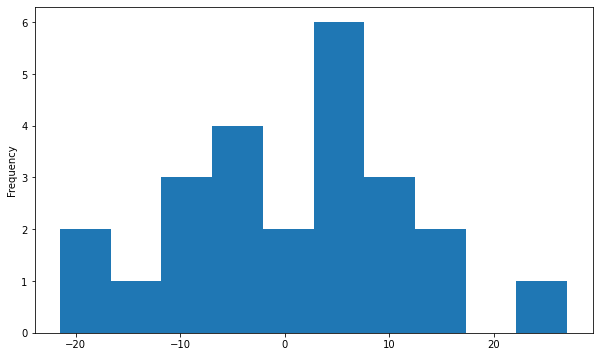

In [44]:
data['Fitted_Line'] = (-9.0075 * data['Dose']) + 99.3313
data['Residuals'] = data['Food_Consumption'] - data['Fitted_Line']
data['Residuals'].plot(kind='hist')
data

**Answer**

Yes, the residuals look like they have a normal distribution and would probably follow a normal distribution more closely as you increase the amount of observations in the dataset.